In [34]:
## this template code allows the user to import their own spreadsheet of genes and use the code with the transcription factor pfm of their choice
import numpy as np
import pandas as pd
dna_sequences = pd.read_csv(input(), delimiter=',')
dna_sequences

gstd1_thor.csv


,gene,sequence
0,gstd1,gagcccacttttataggggccggctgtggtcgccacaatgccggca...
1,thor,taagtttcgaaaattggaagctgagactacatcgagtattattaag...


In [35]:
## choses pfm dictionary: either stored in code, or user inputs when they run the code
print('Input transcription factor name')
factor = input()
if factor.upper() == 'ATF4':
    profile = {'A': [210, 169, 639, 0, 19, 888, 2, 1, 40, 879, 888, 0, 414], 'C': [71, 117, 202, 0, 0, 0, 372, 0, 838, 21, 3, 266, 272], 'G': [442, 409, 127, 7, 1090, 0, 9, 1104, 16, 0, 1, 62, 101], 'T': [170, 213, 3, 981, 11, 25, 470, 4, 113, 3, 4, 714, 78]}
    profilerevcomp = {'T': [414, 0, 888, 879, 40, 1, 2, 888, 19, 0, 639, 169, 210], 'G': [272, 266, 3, 21, 838, 0, 372, 0, 0, 0, 202, 117, 71], 'C': [101, 62, 1, 0, 16, 1104, 9, 0, 1090, 7, 127, 409, 442], 'A': [78, 714, 4, 3, 113, 4, 470, 25, 11, 981, 3, 213, 170]}
else: 
    print('Enter position frequency matrix scores for A in the format 3 4 5:')
    item1 = [float(x) for x in input().split()]
    print('Enter position frequency matrix scores for C in the format 3 4 5:')
    item2 = [float(x) for x in input().split()]
    print('Enter position frequency matrix scores for G in the format 3 4 5:')
    item3 = [float(x) for x in input().split()]
    print('Enter position frequency matrix scores for T in the format 3 4 5:')
    item4 = [float(x) for x in input().split()]
    profile = {'A':item1, 'C': item2, 'G': item3, 'T': item4}
    profilerevcomp = {'T':item1[::-1], 'G': item2[::-1], 'C': item3[::-1], 'A': item4[::-1]}
 ## generates maximum binding score of transcription factor
max_binding_list = []
for i in range(len(profile['A'])):
    score_list = []
    score_list.append(profile['A'][i])
    score_list.append(profile['C'][i])
    score_list.append(profile['G'][i])
    score_list.append(profile['T'][i])
    max_binding_list.append(max(score_list))
max_score = sum(max_binding_list)

Input transcription factor name
atf4


Input name of column with DNA sequences
sequence
Input name of column with gene names
gene

gstd1


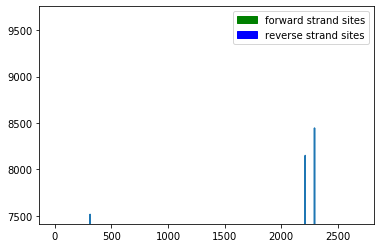

gagcccacttttataggggccggctgtggtcgccacaatgccggcaaacaagagttgtagcttgaagcgccccgcggggcgtggcaaggtggggagagaggtacagagagagagagagggggctgctagttgttgtcgtgcctgggttttttttttgtcttctattatattctgacttgcccacacatacccactaatggcgggcaaaaatgtgacgttagcggcgtgattaatacactgttgtgtggccatgggtgtgtggagacgattgatagtgtgtgtgtgcgtgctctggaggaggttgcactctatcCGTTCCCTCATACacctccaccatacccccgcaaaagaaagctgcaactttctaatgatcctccattggaacgaagccttttactcgcttaagaacaaattttgttacatttctttataatttctgattttaacaaacagataacaaagaagatacaatcctgccatacaggtattattaatcgtagggtatttacacatcgacttgctaagattagcaaacacataagcatgcaatcgattagcttgaaacacaattttgcatttctaatgaacatctgtgcgcctgaaaaaacataaattcttttaaaatgcaaaaaaaaataagtacaaacaaataagcaggcaaacagaaaccagataagaattcaagccggccggcaaacattgatatcaggcaaacatatatgtatgtatgtacatatgtacatatatagcaacagttgtcgagtatttccaacacacaagcaaatcgcgaaaggctcataccgtactaataagaccataaaaatataaccgtttttcgaattattcaatatactttgactcatagtaataattttaatgggtaagcccaagctatggtagacaaatagtagtagattaaatgatgagtcaaaggcacatgcaaattcgaaattactggtacacattttcaatgtaacaatatggatgggcttagtccata

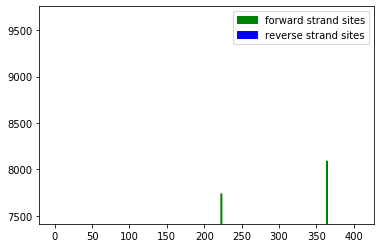

taagtttcgaaaattggaagctgagactacatcgagtattattaagttccttccggaaagtggagtgattttcttatcattagatatgatatcaagatgaaattaatcaacatatttcgaaaacataaacaagtataccgtttctttcctttgctcaaacaacaaacaagcttttgtttgagttgtgatacattatttttgtaaaactcactcaccattttttGGCTGATGAAACTgggccatctcgccgagtcagtcagttggaagataatcccgagcacatgttccacagttcgtgactcagagtagcgcggcaaagaagcgtttactcagctggcttatcagtggggaactttgaatacctTTCTGATGCAACGcagaccaccttgactaataaaaatttccgctttcctataattcc

2 binding sites
GGCTGATGAAACT: 79 percent of the max binding score
TTCTGATGCAACG: 82 percent of the max binding score


In [36]:
from termcolor import colored 
from colorama import Fore
from colorama import Style
from matplotlib import pyplot
import matplotlib.patches as mpatches
import re
## user inputs column names to access values from dataframe
## for loop goes through DNA sequences in data frame and analyzes each
print("Input name of column with DNA sequences")
DNA_column = dna_sequences[input()]
print("Input name of column with gene names")
gene_column = dna_sequences[input()]
for i in range(len(DNA_column)):
    ## accesses sequences from spreadsheet 
    DNA = DNA_column.iloc[i]
    seq = str(DNA).lower()
    gene = gene_column.iloc[i]
    print('\n' + Fore.RED + '\033[5m' + gene)
    ## reads DNA sequence moving through one base pair at a time and creating binding scores for sequences equal to the length of the transcription factor binding site
    def transcription_factor (seq, profile):
        width = len(profile['T'])
        bindingscore = []
        for i in range(len(seq)-width):
            score = 0
            for j in range(width):
                letter = seq[i+j]
                score += profile[letter][j]
            bindingscore.append (score)
        return bindingscore 
    upperseq = seq.upper()
    bindingscores = transcription_factor(upperseq, profile)
    revcompbindingscores = transcription_factor (upperseq, profilerevcomp)
    ## generates figures 
    pyplot.plot (revcompbindingscores)
    pyplot.ylim (0.76 * max_score, max_score)
    pyplot.plot (bindingscores, "green")
    pyplot.ylim (0.76 * max_score, max_score)
    green_patch = mpatches.Patch(color='green', label='forward strand sites')
    blue_patch = mpatches.Patch(color='blue', label='reverse strand sites')
    pyplot.legend(handles=[green_patch, blue_patch])
    pyplot.show()
    ## presents binding site information 
    forsites = []
    forpairs = []
    revsites = []
    revpairs = []
    def binding_sites (binding, sites, pairs): 
        for i in range (len(binding)):
            if binding[i] > 0.76 * max_score: 
                number = binding[i]
                sequence = DNA[i:i + len(profile['A'])]
                sites.append(sequence)
                percent_max_score = int(number/max_score * 100.0)
                pair = sequence.upper() + ': ' + str(percent_max_score) + " percent of the max binding score"
                pairs.append(str(pair))
        return sites, pairs 
    binding_sites(bindingscores, forsites, forpairs)
    binding_sites(revcompbindingscores, revsites, revpairs)
    ## color codes sites and displays them in the DNA sequence 
    def replace_all(text, sites, color):
        for i in range (len(sites)):
            visible_sites = colored(sites[i].upper(), color, attrs=['bold'])
            text = text.replace(sites[i], visible_sites)
        return text
    forDNA = replace_all(seq, forsites, 'green')
    finalDNA = replace_all(forDNA, revsites, 'blue')
    print(finalDNA)
    ##presents binding scores for both original and revcomp
    allsites = forsites + revsites
    print('\n' + Fore.RED + str(len(allsites)) + ' binding sites')
    print(Fore.BLUE + '\n'.join(revpairs) + Fore.GREEN + '\n'.join(forpairs))